In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 19 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Fetched 10.3 MB in 11s (960 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 120874 files and direc

In [ ]:
import matplotlib.pyplot as plt

plt.rc('font', family='NanumBarunGothic')

In [ ]:
import pandas as pd

df = pd.read_excel('/content/dumi_scaled_result.xlsx')
df

,Unnamed: 0,buld_strct_dong_cnt,ground_nof,bstory_cnt,totar,bottom_area,dth_cnt,injpsn_cnt,dth_hnl_dmge_cnt,prprty_dmge_amt,...,mub_yn_Y,emrg_crg_oper_yn_Y,fld_fire_se_기타,fld_fire_se_논/밭두렁으로부터확대,fld_fire_se_담뱃불,fld_fire_se_미상,fld_fire_se_쓰레기소각장에서확대,fld_fire_ign_bhf_산아래,fld_fire_ign_bhf_산중턱,fld_fire_ign_bhf_평지
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,1,2,0,114,71,0,0,0,8860,...,0,0,0,0,0,0,0,0,0,0
3,3,0,0,0,0,0,0,0,0,6672,...,0,0,0,0,0,0,0,0,0,0
4,4,1,10,0,1448,207,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2001,2263,1,1,0,853,12,0,0,0,326,...,0,0,0,0,0,0,0,0,0,0
2002,2266,1,2,0,418,211,0,0,0,66,...,0,0,0,0,0,0,0,0,0,0
2003,2267,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2004,2268,0,0,0,0,0,0,0,0,194,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# NaN 값이 가장 많은 값 찾기
most_frequent_value = df.mode().iloc[0]

# NaN 값을 가장 많은 값으로 채우기
df = df.fillna(most_frequent_value)

## 위에 거나 아래 거 둘 중에 하나만 해서 결측값 채우기

In [ ]:
# NaN 값을 랜덤하게 열의 다른 값으로 채우기
for column in df.columns:
    nan_mask = df[column].isna()
    if nan_mask.any():
        non_nan_values = df.loc[~nan_mask, column].to_numpy()
        random_indices = np.random.choice(non_nan_values, size=np.sum(nan_mask), replace=True)
        df.loc[nan_mask, column] = random_indices

In [ ]:
df.isna()

,Unnamed: 0,buld_strct_dong_cnt,ground_nof,bstory_cnt,totar,bottom_area,dth_cnt,injpsn_cnt,dth_hnl_dmge_cnt,prprty_dmge_amt,...,mub_yn_Y,emrg_crg_oper_yn_Y,fld_fire_se_기타,fld_fire_se_논/밭두렁으로부터확대,fld_fire_se_담뱃불,fld_fire_se_미상,fld_fire_se_쓰레기소각장에서확대,fld_fire_ign_bhf_산아래,fld_fire_ign_bhf_산중턱,fld_fire_ign_bhf_평지
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2001,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2002,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2003,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2004,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
from sklearn.model_selection import train_test_split


X = df.drop('resrc_p', axis=1)
# 현장소방서거리 타겟 변수 설정
y = df['resrc_p']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.ensemble import RandomForestRegressor  # RandomForestRegressor를 임포트합니다
from sklearn.metrics import mean_squared_error, r2_score
import time
import numpy as np

# 평가 함수 (평가 지표는 회귀 모델에 맞게 수정)
def get_reg_eval(y_test, pred):
    mse = mean_squared_error(y_test, pred)  # 평균 제곱 오차 (MSE)
    rmse = np.sqrt(mse)  # 평균 제곱근 오차 (RMSE)
    r2 = r2_score(y_test, pred)  # R-squared (R2) 값
    print(f'Mean Squared Error: {mse:.4f}')
    print(f'Root Mean Squared Error: {rmse:.4f}')
    print(f'R-squared (R2) Score: {r2:.4f}')

# 학습, 평가 함수 (수정된 모델을 사용하도록 수정)
def get_model_train_eval(model, ftr_train=None, ftr_test=None, tgt_train=None, tgt_test=None):
    model.fit(ftr_train, tgt_train)
    pred = model.predict(ftr_test)
    get_reg_eval(tgt_test, pred)

# RandomForestRegressor 모델을 생성하고 학습, 평가 수행
rf_regressor = RandomForestRegressor(n_estimators=1000, n_jobs=-1)

print('====== 랜덤 포레스트 회귀 모델 =======\n')

start_time = time.time()  # 학습 및 평가 시작 시간 기록

get_model_train_eval(rf_regressor, ftr_train=X_train, ftr_test=X_test, tgt_train=y_train, tgt_test=y_test)

end_time = time.time()  # 학습 및 평가 종료 시간 기록
elapsed_time = end_time - start_time  # 실행 시간 계산

print(f'학습 및 평가 소요 시간: {elapsed_time:.4f} 초')

====== 랜덤 포레스트 회귀 모델 =======

Mean Squared Error: 0.0160
Root Mean Squared Error: 0.1264
R-squared (R2) Score: 1.0000
학습 및 평가 소요 시간: 10.9926 초


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 48512 (\N{HANGUL SYLLABLE BU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49328 (\N{HANGUL SYLLABLE SAN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51652 (\N{HANGUL SYLLABLE JIN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49548 (\N{HANGUL SYLLABLE SO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 48169 (\N{HANGUL SYLLABLE BANG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/I

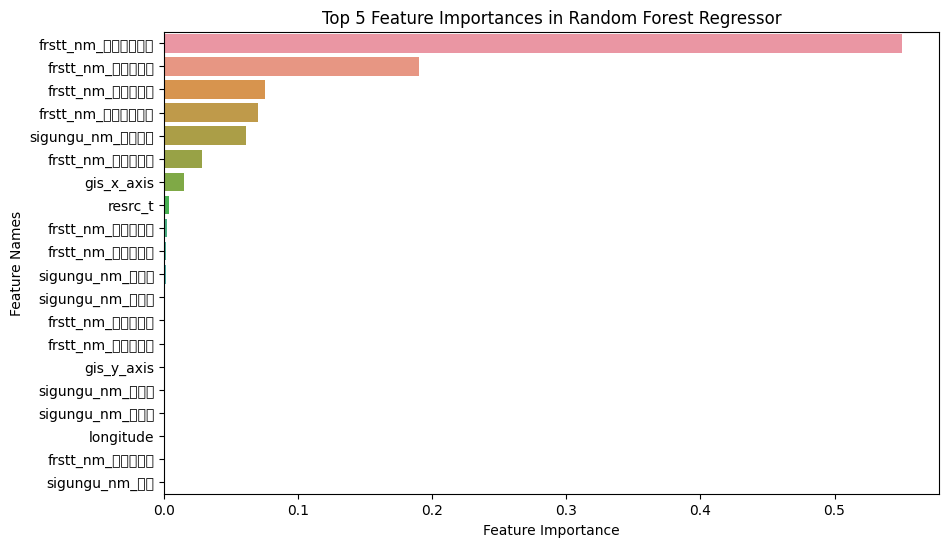

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# 학습된 모델의 피처 중요도를 추출
feature_importances = rf_regressor.feature_importances_
feature_names = X_train.columns
# 피처 중요도를 기준으로 내림차순으로 정렬
feature_importances_sorted = np.argsort(feature_importances)[::-1]

# 상위 5개 피처 추출
top_feature_indices = feature_importances_sorted[:20]
top_feature_names = feature_names[top_feature_indices]  # feature_names 변수 정의 필요
top_feature_importances = feature_importances[top_feature_indices]

# 피처 중요도 시각화
plt.figure(figsize=(10, 6))
sns.barplot(x=top_feature_importances, y=top_feature_names)
plt.xlabel('Feature Importance')
plt.ylabel('Feature Names')
plt.title('Top 5 Feature Importances in Random Forest Regressor')
plt.show()


In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [ ]:
pca = PCA(n_components=191) # 주성분을 몇개로 할지 결정
printcipalComponents = pca.fit_transform(X)

In [ ]:
sum(pca.explained_variance_ratio_)

0.9999999999999999

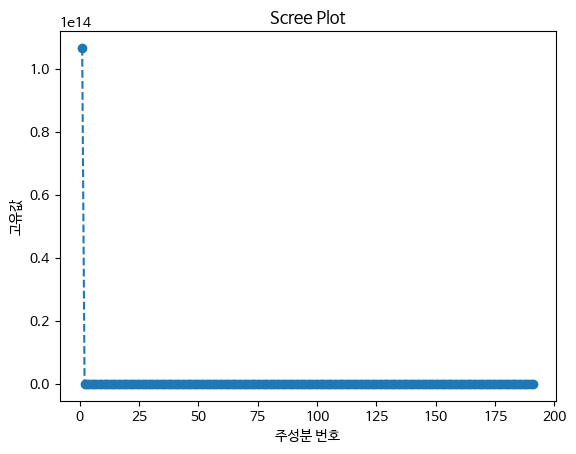

In [ ]:
import matplotlib.pyplot as plt

# 고유값 확인
eigenvalues = pca.explained_variance_

# Scree Plot 그리기
plt.plot(range(1, len(eigenvalues) + 1), eigenvalues, marker='o', linestyle='--')
plt.xlabel('주성분 번호')
plt.ylabel('고유값')
plt.title('Scree Plot')
plt.show()

In [ ]:
pca = PCA(n_components=10) # 주성분을 몇개로 할지 결정
printcipalComponents = pca.fit_transform(X)

In [ ]:
sum(pca.explained_variance_ratio_)

0.9999999998576585

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(printcipalComponents, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.ensemble import RandomForestRegressor  # RandomForestRegressor를 임포트합니다
from sklearn.metrics import mean_squared_error, r2_score
import time
import numpy as np

# 평가 함수 (평가 지표는 회귀 모델에 맞게 수정)
def get_reg_eval(y_test, pred):
    mse = mean_squared_error(y_test, pred)  # 평균 제곱 오차 (MSE)
    rmse = np.sqrt(mse)  # 평균 제곱근 오차 (RMSE)
    r2 = r2_score(y_test, pred)  # R-squared (R2) 값
    print(f'Mean Squared Error: {mse:.4f}')
    print(f'Root Mean Squared Error: {rmse:.4f}')
    print(f'R-squared (R2) Score: {r2:.4f}')

# 학습, 평가 함수 (수정된 모델을 사용하도록 수정)
def get_model_train_eval(model, ftr_train=None, ftr_test=None, tgt_train=None, tgt_test=None):
    model.fit(ftr_train, tgt_train)
    pred = model.predict(ftr_test)
    get_reg_eval(tgt_test, pred)

# RandomForestRegressor 모델을 생성하고 학습, 평가 수행
rf_regressor = RandomForestRegressor(n_estimators=1000, n_jobs=-1)

print('====== 랜덤 포레스트 회귀 모델 =======\n')

start_time = time.time()  # 학습 및 평가 시작 시간 기록
get_model_train_eval(rf_regressor, ftr_train=X_train, ftr_test=X_test, tgt_train=y_train, tgt_test=y_test)

end_time = time.time()  # 학습 및 평가 종료 시간 기록
elapsed_time = end_time - start_time  # 실행 시간 계산

print(f'학습 및 평가 소요 시간: {elapsed_time:.4f} 초')

====== 랜덤 포레스트 회귀 모델 =======

Mean Squared Error: 12.2753
Root Mean Squared Error: 3.5036
R-squared (R2) Score: 0.6745
학습 및 평가 소요 시간: 11.2866 초


## XGBoost로

In [ ]:
from sklearn.model_selection import train_test_split


X = df.drop('spt_frstt_dist', axis=1)
y = df['spt_frstt_dist']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
import xgboost as xgb
from xgboost import XGBRegressor  # XGBRegressor로 변경
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# X_train, X_test, y_train, y_test가 정의되어 있다고 가정합니다.

# 평가 함수 (평가 지표는 회귀 모델에 맞게 수정)
def get_reg_eval(y_test, pred):
    mse = mean_squared_error(y_test, pred)  # 평균 제곱 오차 (MSE)
    rmse = np.sqrt(mse)  # 평균 제곱근 오차 (RMSE)
    r2 = r2_score(y_test, pred)  # R-squared (R2) 값
    print('====== XGBoost 회귀 모델 =======\n')
    print('평균 제곱 오차 (MSE): {:.4f}'.format(mse))
    print('평균 제곱근 오차 (RMSE): {:.4f}'.format(rmse))
    print('결정 계수 (R2) 값: {:.4f}'.format(r2))

xgb_regressor = XGBRegressor(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=3
)
xgb_regressor.fit(X_train, y_train)
w_preds = xgb_regressor.predict(X_test)
start_time = time.time()  # 학습 및 평가 시작 시간 기록

get_reg_eval(y_test, w_preds)  # 회귀 평가 함수 호출

end_time = time.time()  # 학습 및 평가 종료 시간 기록
elapsed_time = end_time - start_time  # 실행 시간 계산

print(f'학습 및 평가 소요 시간: {elapsed_time:.4f} 초')

====== XGBoost 회귀 모델 =======

평균 제곱 오차 (MSE): 0.2188
평균 제곱근 오차 (RMSE): 0.4678
결정 계수 (R2) 값: 0.9998
학습 및 평가 소요 시간: 0.0026 초


### r2 : 회귀모델에서 독립 변수가 종속 변수를 얼마나 잘 설명해주는지 보여주는 지표이다

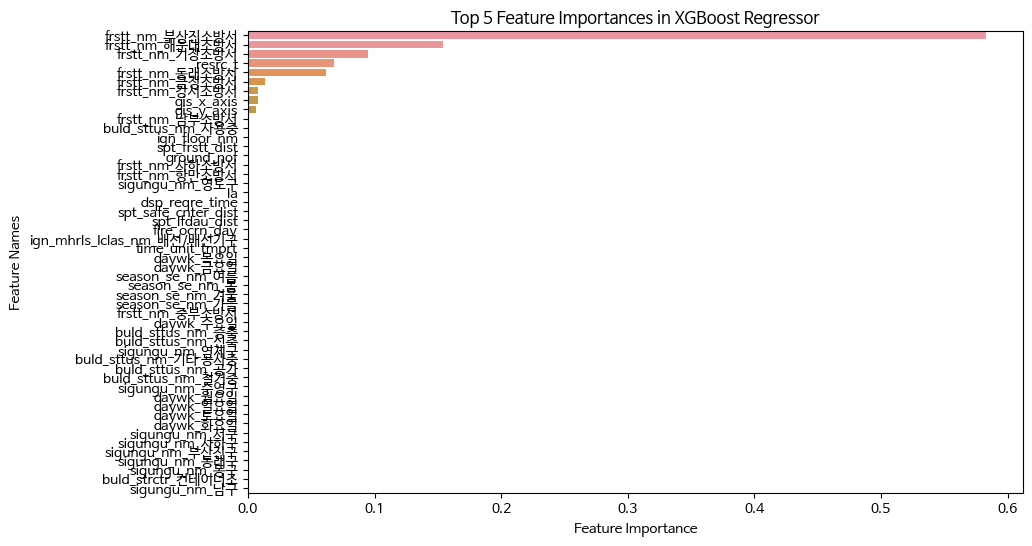

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# XGBoost 모델에서 피처 중요도를 가져옵니다.
feature_importances = xgb_regressor.feature_importances_

# 피처 중요도를 기준으로 내림차순으로 정렬합니다.
feature_importances_sorted = np.argsort(feature_importances)[::-1]

# 상위 5개 피처 추출
top_feature_indices = feature_importances_sorted[:50]
top_feature_names = X_train.columns[top_feature_indices]
top_feature_importances = feature_importances[top_feature_indices]

# 피처 중요도 시각화
plt.figure(figsize=(10, 6))
sns.barplot(x=top_feature_importances, y=top_feature_names)
plt.xlabel('Feature Importance')
plt.ylabel('Feature Names')
plt.title('Top 5 Feature Importances in XGBoost Regressor')
plt.show()

# 인력, 장비, x, y, 면적

In [ ]:
pca = PCA(n_components=10) # 주성분을 몇개로 할지 결정
printcipalComponents = pca.fit_transform(X)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(printcipalComponents, y, test_size=0.2, random_state=42)

In [ ]:
import xgboost as xgb
from xgboost import XGBRegressor  # XGBRegressor로 변경
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# X_train, X_test, y_train, y_test가 정의되어 있다고 가정합니다.

# 평가 함수 (평가 지표는 회귀 모델에 맞게 수정)
def get_reg_eval(y_test, pred):
    mse = mean_squared_error(y_test, pred)  # 평균 제곱 오차 (MSE)
    rmse = np.sqrt(mse)  # 평균 제곱근 오차 (RMSE)
    r2 = r2_score(y_test, pred)  # R-squared (R2) 값
    print('====== XGBoost 회귀 모델 =======\n')
    print('평균 제곱 오차 (MSE): {:.4f}'.format(mse))
    print('평균 제곱근 오차 (RMSE): {:.4f}'.format(rmse))
    print('결정 계수 (R2) 값: {:.4f}'.format(r2))

xgb_regressor = XGBRegressor(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=3
)
xgb_regressor.fit(X_train, y_train)
w_preds = xgb_regressor.predict(X_test)
start_time = time.time()  # 학습 및 평가 시작 시간 기록

get_reg_eval(y_test, w_preds)  # 회귀 평가 함수 호출

end_time = time.time()  # 학습 및 평가 종료 시간 기록
elapsed_time = end_time - start_time  # 실행 시간 계산

print(f'학습 및 평가 소요 시간: {elapsed_time:.4f} 초')

====== XGBoost 회귀 모델 =======

평균 제곱 오차 (MSE): 13.0177
평균 제곱근 오차 (RMSE): 3.6080
결정 계수 (R2) 값: 0.6548
학습 및 평가 소요 시간: 0.0028 초


## 의사결정나무

In [ ]:
from sklearn.model_selection import train_test_split


X = df.drop('spt_frstt_dist', axis=1)
y = df['spt_frstt_dist']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.tree import DecisionTreeRegressor  # DecisionTreeRegressor를 임포트합니다

# 학습, 평가 함수 (회귀 모델을 사용하도록 수정)
def get_reg_eval(y_test, pred):
    mse = mean_squared_error(y_test, pred)  # 평균 제곱 오차 (MSE)
    rmse = np.sqrt(mse)  # 평균 제곱근 오차 (RMSE)
    r2 = r2_score(y_test, pred)  # R-squared (R2) 값
    print(f'Mean Squared Error: {mse:.4f}')
    print(f'Root Mean Squared Error: {rmse:.4f}')
    print(f'R-squared (R2) Score: {r2:.4f}')

# DecisionTreeRegressor 모델을 생성하고 학습, 평가 수행
dt_regressor = DecisionTreeRegressor(random_state=156)  # DecisionTreeRegressor 모델을 생성
dt_regressor.fit(X_train, y_train)
w_preds = dt_regressor.predict(X_test)

print('====== 의사결정 나무 회귀 모델 =======\n')
start_time = time.time()  # 학습 및 평가 시작 시간 기록
get_reg_eval(y_test, w_preds)  # 회귀 평가 함수 호출

end_time = time.time()  # 학습 및 평가 종료 시간 기록
elapsed_time = end_time - start_time  # 실행 시간 계산

print(f'학습 및 평가 소요 시간: {elapsed_time:.4f} 초')


====== 의사결정 나무 회귀 모델 =======

Mean Squared Error: 10.8433
Root Mean Squared Error: 3.2929
R-squared (R2) Score: 0.7124
학습 및 평가 소요 시간: 0.0027 초


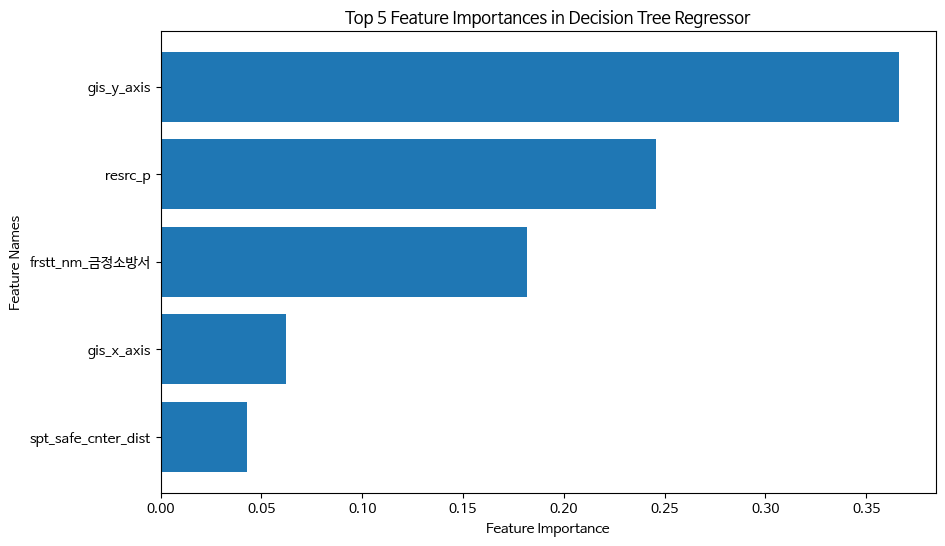

In [ ]:
import matplotlib.pyplot as plt

# Decision Tree 모델에서 피처 중요도를 가져옵니다.
feature_importances = dt_regressor.feature_importances_

# 피처 중요도를 기준으로 내림차순으로 정렬합니다.
top_feature_indices = feature_importances.argsort()[::-1][:5]
top_feature_importances = feature_importances[top_feature_indices]
top_feature_names = X_train.columns[top_feature_indices]

# 상위 5개 피처의 중요도를 큰 것부터 위에서 아래로 정렬하여 시각화
plt.figure(figsize=(10, 6))
plt.barh(range(len(top_feature_importances), 0, -1), top_feature_importances, align='center')
plt.yticks(range(len(top_feature_importances), 0, -1), top_feature_names)
plt.xlabel('Feature Importance')
plt.ylabel('Feature Names')
plt.title('Top 5 Feature Importances in Decision Tree Regressor')
plt.show()

# y, 인력, 장비, x, 면적

In [ ]:
pca = PCA(n_components=10) # 주성분을 몇개로 할지 결정
printcipalComponents = pca.fit_transform(X)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(printcipalComponents, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.tree import DecisionTreeRegressor  # DecisionTreeRegressor를 임포트합니다

# 학습, 평가 함수 (회귀 모델을 사용하도록 수정)
def get_reg_eval(y_test, pred):
    mse = mean_squared_error(y_test, pred)  # 평균 제곱 오차 (MSE)
    rmse = np.sqrt(mse)  # 평균 제곱근 오차 (RMSE)
    r2 = r2_score(y_test, pred)  # R-squared (R2) 값
    print(f'Mean Squared Error: {mse:.4f}')
    print(f'Root Mean Squared Error: {rmse:.4f}')
    print(f'R-squared (R2) Score: {r2:.4f}')

# DecisionTreeRegressor 모델을 생성하고 학습, 평가 수행
dt_regressor = DecisionTreeRegressor(random_state=156)  # DecisionTreeRegressor 모델을 생성
dt_regressor.fit(X_train, y_train)
w_preds = dt_regressor.predict(X_test)

print('====== 의사결정 나무 회귀 모델 =======\n')
start_time = time.time()  # 학습 및 평가 시작 시간 기록
get_reg_eval(y_test, w_preds)  # 회귀 평가 함수 호출

end_time = time.time()  # 학습 및 평가 종료 시간 기록
elapsed_time = end_time - start_time  # 실행 시간 계산

print(f'학습 및 평가 소요 시간: {elapsed_time:.4f} 초')


====== 의사결정 나무 회귀 모델 =======

Mean Squared Error: 17.5199
Root Mean Squared Error: 4.1857
R-squared (R2) Score: 0.5354
학습 및 평가 소요 시간: 0.0012 초
